In [497]:
import torch
import torch.nn as nn
from torch.optim import adam
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [498]:
BASE_DIR = "/home/sid/Drive_D/auto_encoders/" # Change this to your base directory
DATA_DIR = os.path.join(BASE_DIR, "data")

if not os.path.exists(DATA_DIR):
    print(f"{DATA_DIR} doesn't exist. Creating one!", DATA_DIR)
    os.mkdir(DATA_DIR)

# We will be working with the simplest image dataset out there: MNIST.

# Defining the transforms

In [499]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors and scales to [0, 1]
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Data augmentation
])

# Downloading the dataset

In [562]:
mnist_test = datasets.MNIST(DATA_DIR, transform=transform, download=True, train=False)
mnist_train = datasets.MNIST(DATA_DIR, transform=transform, download=True, train=True)

In [563]:
train_dataloader = DataLoader(mnist_train, 
                                batch_size=100,
                                shuffle=True,
                                num_workers=10
                             )
test_dataloader = DataLoader(mnist_test, 
                                batch_size=100,
                                shuffle=False,
                                num_workers=10
                             )

# Let's look at an image example from the training set

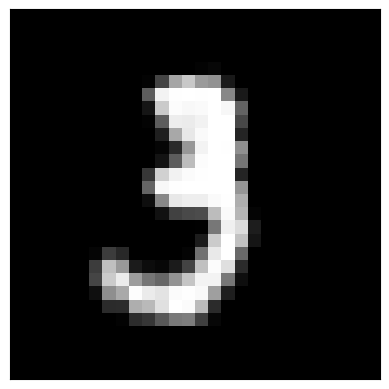

In [564]:
def plot_image(tensor_img):
    plt.imshow(transforms.ToPILImage()(tensor_img), cmap='gray')
    plt.xticks([])
    plt.yticks([]);
plot_image(mnist_train[10][0])

# Defining the Auto Encoder Module

In [565]:
class FFAutoEncoder(nn.Module):
    
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, latent_dim), # bottle neck
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 50), # bottle neck
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, input_dim),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x) # encoding
        x = self.decoder(x) # reconstruction
        return x

In [566]:
# model configs
latent_dim = 25
input_dim = 784


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = FFAutoEncoder(input_dim=input_dim, latent_dim=latent_dim).to(device)
optimizer = adam.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [568]:
from tqdm import tqdm

epochs = 30

for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}", leave=True)

    for batch in progress_bar:
        image, _ = batch
        B, C, W, H = image.shape
        image = image.reshape((B, C, -1)).to(device)

        optimizer.zero_grad()
        logits = model.forward(image)
        
        loss = criterion(logits, image)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update progress bar with loss
        progress_bar.set_postfix(loss=loss.item())
    
    print(f"Epoch {epoch+1}: Avg Loss: {running_loss / len(train_dataloader):.6f}")

Epoch 1: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 174.49it/s, loss=0.0248]


Epoch 1: Avg Loss: 0.028347


Epoch 2: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 175.05it/s, loss=0.0213]


Epoch 2: Avg Loss: 0.023142


Epoch 3: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 175.52it/s, loss=0.0202]


Epoch 3: Avg Loss: 0.020155


Epoch 4: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 175.58it/s, loss=0.0168]


Epoch 4: Avg Loss: 0.018247


Epoch 5: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 179.66it/s, loss=0.0166]


Epoch 5: Avg Loss: 0.016865


Epoch 6: 100%|██████████████████████████████████| 600/600 [00:03<00:00, 174.45it/s, loss=0.016]


Epoch 6: Avg Loss: 0.015799


Epoch 7: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 167.85it/s, loss=0.0153]


Epoch 7: Avg Loss: 0.015075


Epoch 8: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 174.05it/s, loss=0.0129]


Epoch 8: Avg Loss: 0.014569


Epoch 9: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 166.49it/s, loss=0.0133]


Epoch 9: Avg Loss: 0.014057


Epoch 10: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 169.99it/s, loss=0.013]


Epoch 10: Avg Loss: 0.013590


Epoch 11: 100%|████████████████████████████████| 600/600 [00:03<00:00, 168.18it/s, loss=0.0139]


Epoch 11: Avg Loss: 0.013169


Epoch 12: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 171.90it/s, loss=0.012]


Epoch 12: Avg Loss: 0.012781


Epoch 13: 100%|████████████████████████████████| 600/600 [00:03<00:00, 168.86it/s, loss=0.0127]


Epoch 13: Avg Loss: 0.012311


Epoch 14: 100%|█████████████████████████████████| 600/600 [00:03<00:00, 167.54it/s, loss=0.013]


Epoch 14: Avg Loss: 0.011927


Epoch 15: 100%|████████████████████████████████| 600/600 [00:03<00:00, 167.80it/s, loss=0.0116]


Epoch 15: Avg Loss: 0.011626


Epoch 16: 100%|████████████████████████████████| 600/600 [00:03<00:00, 166.43it/s, loss=0.0122]


Epoch 16: Avg Loss: 0.011383


Epoch 17: 100%|████████████████████████████████| 600/600 [00:03<00:00, 166.00it/s, loss=0.0108]


Epoch 17: Avg Loss: 0.011200


Epoch 18: 100%|████████████████████████████████| 600/600 [00:03<00:00, 170.34it/s, loss=0.0107]


Epoch 18: Avg Loss: 0.011020


Epoch 19: 100%|████████████████████████████████| 600/600 [00:03<00:00, 168.95it/s, loss=0.0101]


Epoch 19: Avg Loss: 0.010857


Epoch 20: 100%|███████████████████████████████| 600/600 [00:03<00:00, 162.91it/s, loss=0.00996]


Epoch 20: Avg Loss: 0.010737


Epoch 21: 100%|████████████████████████████████| 600/600 [00:03<00:00, 166.38it/s, loss=0.0102]


Epoch 21: Avg Loss: 0.010592


Epoch 22: 100%|███████████████████████████████| 600/600 [00:03<00:00, 172.70it/s, loss=0.00975]


Epoch 22: Avg Loss: 0.010483


Epoch 23: 100%|███████████████████████████████| 600/600 [00:03<00:00, 168.21it/s, loss=0.00984]


Epoch 23: Avg Loss: 0.010401


Epoch 24: 100%|██████████████████████████████████| 600/600 [00:03<00:00, 165.78it/s, loss=0.01]


Epoch 24: Avg Loss: 0.010315


Epoch 25: 100%|████████████████████████████████| 600/600 [00:03<00:00, 169.71it/s, loss=0.0106]


Epoch 25: Avg Loss: 0.010201


Epoch 26: 100%|████████████████████████████████| 600/600 [00:03<00:00, 169.96it/s, loss=0.0106]


Epoch 26: Avg Loss: 0.010146


Epoch 27: 100%|████████████████████████████████| 600/600 [00:03<00:00, 161.58it/s, loss=0.0103]


Epoch 27: Avg Loss: 0.010080


Epoch 28: 100%|███████████████████████████████| 600/600 [00:03<00:00, 169.99it/s, loss=0.00961]


Epoch 28: Avg Loss: 0.009990


Epoch 29: 100%|███████████████████████████████| 600/600 [00:03<00:00, 173.47it/s, loss=0.00852]


Epoch 29: Avg Loss: 0.009885


Epoch 30: 100%|███████████████████████████████| 600/600 [00:03<00:00, 169.85it/s, loss=0.00926]

Epoch 30: Avg Loss: 0.009869


In [584]:
@torch.no_grad()
def inference(model, input_tensor):
    C, W, H = input_tensor.shape
    reconstructed = input_tensor.reshape((C, -1))
    return reconstructed.view(C, W, H)

In [589]:
test_image = mnist_test[10][0]

In [590]:
generated = inference(model, test_image)

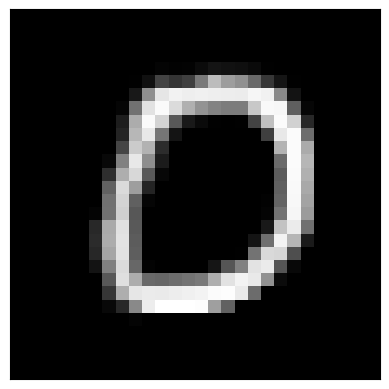

In [591]:
plot_image(test_image)

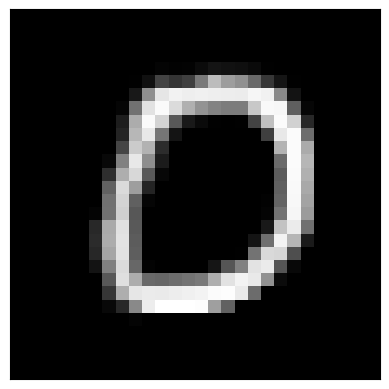

In [592]:
plot_image(generated)